# File setup

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

np.random.seed(0)

TRAINING_PERCENT = 0.8

In [2]:
data_table = pd.DataFrame(pd.read_csv('Housing.csv'))
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# m = len(data_table)
# print(f"m = {m}")
print(f"shape = {np.shape(data_table)}")

# creates a list of all variables from the column names
var_list = data_table.columns 
var_list = list(var_list)
num_vars = len(var_list)

y_var_list = [var_list[0]]

print(f"exp_var = {var_list}")
print(f"y_var = {y_var_list}")

shape = (545, 13)
exp_var = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
y_var = ['price']


In [4]:
# Maps to turn categorys into numbers 
def boolean_map(x):
    return x.map({'yes': 1 , 'no': 0})
def furnish_map(x):
    return x.map({'furnished': 2 , 'semi-furnished': 1 , 'unfurnished': 0})
def scaled_furnish_map(x):
    return x.map({'furnished': 1 , 'semi-furnished': 0.5 , 'unfurnished': 0})

# Extracts the yes and no column names
binary_vars = [*var_list[5:10] , var_list[11]]
print(f"binary vars = {binary_vars}")

# Extracts the furnishing column names
furnish_vars = [var_list[12]]
print(f"furnish vars = {furnish_vars}")

# Extracts the column names that are actual values
valued_vars = var_list.copy()
[valued_vars.remove( item ) for item in binary_vars]
[valued_vars.remove( item ) for item in furnish_vars]
print(f"value vars = {valued_vars}")

binary vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnish vars = ['furnishingstatus']
value vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [5]:
def plot_2_sets_of_data(iterations:int, cost_history_training, cost_history_validation, title:str, color_1:str = "blue", color_2:str = "red"):
    """
    Allows for plotting of the two data sets in one simple function

    Args:
        iterations (int): number of iterations in data
        cost_history (list): loss values for the training set
        validation_history (list): loss values for the validation set
        color_1 (str, optional): string of the color for the plotted cost history. Defaults to "blue".
        color_2 (str, optional): string of the color for the plotted validation history. Defaults to "red".
    """
    plt.plot(range(1, iterations + 1) , cost_history_training   , color=color_1) 
    plt.plot(range(1, iterations + 1) , cost_history_validation , color=color_2) 
    plt.rcParams["figure.figsize"] = (10,6) 
    plt.grid() 
    plt.xlabel('Number of iterations') 
    plt.ylabel('Cost (J)') 
    plt.legend(["Training Set", "Validation Set"])
    plt.title(title) ;

In [6]:
def compute_cost(x, y, theta, m:int, debug:bool=False): 
    """ 
    Compute cost for linear regression. 

    Input Parameters 
    ---------------- 
    X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
    y : 1D array of labels/target value for each traing example. dimension(1 x m) 

    theta : 1D array of fitting parameters or weights. Dimension (1 x n) 

    Output Parameters 
    ----------------- 
    J : Scalar value. 
    """ 
    if(debug):
        print("x shape = ", np.shape(x))
        print("y shape = ", np.shape(y))
        print("theta shape = ", np.shape(theta))
        
    predictions = x.dot(theta) 
    errors = np.subtract(predictions, y) 
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum( sqrErrors ) 

    if(debug):
        print(sqrErrors)
        print(J)

    return J 

This initial setup allowed for easy copying of initial conditions

# Question 1

## Setup

In [7]:
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [8]:
unscaled_data = data_table.copy()

# scaler = StandardScaler()
scaler = MinMaxScaler()

unscaled_data[binary_vars] = unscaled_data[binary_vars].apply(boolean_map)
unscaled_data[furnish_vars] = unscaled_data[furnish_vars].apply(furnish_map)

unscaled_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [9]:
data_train, data_test = train_test_split(unscaled_data, train_size = TRAINING_PERCENT, test_size = 1-TRAINING_PERCENT)

print(f"training data shape = {data_train.shape}")
print(f"test data shape = {data_test.shape}")

training data shape = (436, 13)
test data shape = (109, 13)


In [10]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
496,2695000,4000,2,1,1,1,0,0,0,0,0,0,0
484,2870000,3040,2,1,1,0,0,0,0,0,0,0,0
507,2590000,3600,2,1,1,1,0,0,0,0,0,0,0
252,4515000,9860,3,1,1,1,0,0,0,0,0,0,1


In [11]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
239,4585000,4000,3,1,2,1,0,0,0,0,1,0,2
113,6083000,9620,3,1,1,1,0,1,0,0,2,1,2
325,4007500,3460,4,1,2,1,0,0,0,1,0,0,1
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,2
479,2940000,3660,4,1,2,0,0,0,0,0,0,0,0


In [12]:
x_train_values = data_train.copy() # get all values
x_valid_values = data_test.copy()
for item in y_var_list:
    y_train_values = x_train_values.pop(item) # get y values and remove from x_values
    y_valid_values = x_valid_values.pop(item)

In [13]:
print(x_train_values.shape)
x_train_values.head()

(436, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
542,3620,2,1,1,1,0,0,0,0,0,0,0
496,4000,2,1,1,1,0,0,0,0,0,0,0
484,3040,2,1,1,0,0,0,0,0,0,0,0
507,3600,2,1,1,1,0,0,0,0,0,0,0
252,9860,3,1,1,1,0,0,0,0,0,0,1


In [14]:
print(y_train_values.shape)
y_train_values.head()

(436,)


542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
Name: price, dtype: int64

In [15]:
print(x_valid_values.shape)
x_valid_values.head()

(109, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
239,4000,3,1,2,1,0,0,0,0,1,0,2
113,9620,3,1,1,1,0,1,0,0,2,1,2
325,3460,4,1,2,1,0,0,0,1,0,0,1
66,13200,2,1,1,1,0,1,1,0,1,0,2
479,3660,4,1,2,0,0,0,0,0,0,0,0


In [16]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
Name: price, dtype: int64

In [17]:
def gradient_descent1(x, y, theta, alpha:float, iterations:int, x_validation, y_validation, debug: bool = False): 
    """ 
    Compute cost for linear regression. 

    Args:
        x : 2D array where each row represent the training example and each column represent 
            m= number of training examples 
            n= number of features (including X_0 column of ones) 
        y : 1D array of labels/target value for each traing example. dimension(m x 1) 
        theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
        alpha (float): Learning rate
        iterations (int): Number of iterations
        x_validation : _description_
        y_validation : _description_
        debug (bool, optional): a print debug shape line. Defaults to False.

    Returns:
        theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
        cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
        validation_costs: Conatins validation loss value for each iteration. 1D array. Dimansion(m x 1) 
    """
    cost_history = np.zeros(iterations) 
    validation_cost = np.zeros(iterations) 
    
    m = len(x)
    m_valid = len(x_validation)
    
    for i in range(iterations): 
        predictions = x.dot(theta) 
        if debug:
            print(f"x = {x.shape}")
            print(f"y = {y.shape}")
            print(f"predictions: {predictions.shape}")
        errors = np.subtract(predictions, y) 
        if debug:
            print(f"errors: {errors.shape}")
            print(type(errors))
        transposed = x.transpose()
        if debug: 
            print(f"transposed = {transposed.shape}")
        sum_delta = (alpha / m) * (transposed).dot(errors); 
        if debug:
            print(f"sum_delta: {sum_delta.shape}")
        theta = theta - sum_delta; 
        if debug:
            print(f"theta: {theta.shape}\n\n")
        cost_history[i] = compute_cost(x, y, theta, m) 
        validation_cost[i] = compute_cost(x_validation, y_validation, theta, m_valid)   
    
    return theta, cost_history, validation_cost

## 1a

In [18]:
used_vars_a = ["area", "bedrooms", "bathrooms", "stories", "parking",] 
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_a):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item) #if it doesn exist in the first set then its not in the second
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [19]:
print(used_train_x.shape)
used_train_x.head()


(436, 5)


,area,bedrooms,bathrooms,stories,parking
542,3620,2,1,1,0
496,4000,2,1,1,0
484,3040,2,1,1,0
507,3600,2,1,1,0
252,9860,3,1,1,0


In [20]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 5)


,area,bedrooms,bathrooms,stories,parking
239,4000,3,1,2,1
113,9620,3,1,1,2
325,3460,4,1,2,0
66,13200,2,1,1,1
479,3660,4,1,2,0


In [21]:
print(y_train_values.shape)
y_train_values.head()

(436,)


542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
Name: price, dtype: int64

In [22]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
Name: price, dtype: int64

In [23]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [24]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [25]:
print(valid_X.shape)
print(valid_Y.shape)
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

(109, 6)
(109,)
X=
[[1.00e+00 3.62e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 4.00e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 3.04e+03 2.00e+00 1.00e+00 1.00e+00 0.00e+00]
 ...
 [1.00e+00 5.75e+03 3.00e+00 2.00e+00 4.00e+00 1.00e+00]
 [1.00e+00 3.60e+03 3.00e+00 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 6.60e+03 3.00e+00 1.00e+00 1.00e+00 0.00e+00]]

Y=
[ 1750000  2695000  2870000  2590000  4515000  4410000  4585000  5250000
  3570000  3640000  9800000  2940000  6083000  3255000  4893000  3150000
  2975000  6930000  3500000  5880000  3500000  4235000  3710000  4060000
  2345000  4550000 10150000  3640000  2660000  2233000  2135000  4277000
  6230000  6300000  3920000  7350000  8400000  5215000  7420000  6230000
  4900000  4550000  4060000  3010000  7343000  5600000  7140000 10150000
  9870000  3780000  2940000  2653000  3836000  4760000  7962500  3143000
  3500000  4690000  4340000  4515000  1767150  3080000  5950000  5530000
  3150000  7210000  2800000  3045000  2835000

In [26]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0.]
(6,)
(436, 6)
(109, 6)


In [27]:

# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 13234989983633.717
The validation cost for given values of theta = 12594621888761.469


#### final computations

Final values:
	theta = [1.70454523e-01 8.22745905e+02 5.43899108e-01 2.54302854e-01
 3.67697382e-01 1.47282574e-01]
	cost = 1727417199055.5586
	validation_cost = 1542067317935.2136


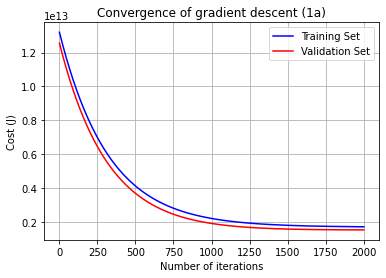

In [28]:
theta = np.zeros(X.shape[1])
iterations = 2000; 
alpha = 0.00000000005; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent1(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (1a)')

## 1b

In [29]:
used_vars_b = ["area","bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea"]
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_b):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [30]:
print(used_train_x.shape)
used_train_x.head()

(436, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
542,3620,2,1,1,1,0,0,0,0,0,0
496,4000,2,1,1,1,0,0,0,0,0,0
484,3040,2,1,1,0,0,0,0,0,0,0
507,3600,2,1,1,1,0,0,0,0,0,0
252,9860,3,1,1,1,0,0,0,0,0,0


In [31]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
239,4000,3,1,2,1,0,0,0,0,1,0
113,9620,3,1,1,1,0,1,0,0,2,1
325,3460,4,1,2,1,0,0,0,1,0,0
66,13200,2,1,1,1,0,1,1,0,1,0
479,3660,4,1,2,0,0,0,0,0,0,0


In [32]:
print(y_train_values.shape)
y_train_values.head()

(436,)


542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
Name: price, dtype: int64

In [33]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
Name: price, dtype: int64

In [34]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [35]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [36]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 12)
(436,)
(109, 12)
(109,)


In [37]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1.00e+00 3.62e+03 2.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 4.00e+03 2.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 [1.00e+00 3.04e+03 2.00e+00 ... 0.00e+00 0.00e+00 0.00e+00]
 ...
 [1.00e+00 5.75e+03 3.00e+00 ... 1.00e+00 1.00e+00 1.00e+00]
 [1.00e+00 3.60e+03 3.00e+00 ... 0.00e+00 1.00e+00 0.00e+00]
 [1.00e+00 6.60e+03 3.00e+00 ... 0.00e+00 0.00e+00 1.00e+00]]

Y=
[ 1750000  2695000  2870000  2590000  4515000  4410000  4585000  5250000
  3570000  3640000  9800000  2940000  6083000  3255000  4893000  3150000
  2975000  6930000  3500000  5880000  3500000  4235000  3710000  4060000
  2345000  4550000 10150000  3640000  2660000  2233000  2135000  4277000
  6230000  6300000  3920000  7350000  8400000  5215000  7420000  6230000
  4900000  4550000  4060000  3010000  7343000  5600000  7140000 10150000
  9870000  3780000  2940000  2653000  3836000  4760000  7962500  3143000
  3500000  4690000  4340000  4515000  1767150  3080000  5950000  5530000
  3150000  7210000  2800000  3045000 

In [38]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12,)
(436, 12)
(109, 12)


In [39]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y, theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 13234989983633.717
The validation cost for given values of theta = 12594621888761.469


#### final computations

Final values:
	theta = [1.70454517e-01 8.22745875e+02 5.43899089e-01 2.54302846e-01
 3.67697371e-01 1.54082592e-01 4.33541190e-02 7.25409496e-02
 1.19732472e-02 8.08307100e-02 1.47282569e-01 5.66466861e-02]
	cost = 1727417082422.3816
	validation_cost = 1542067208922.813


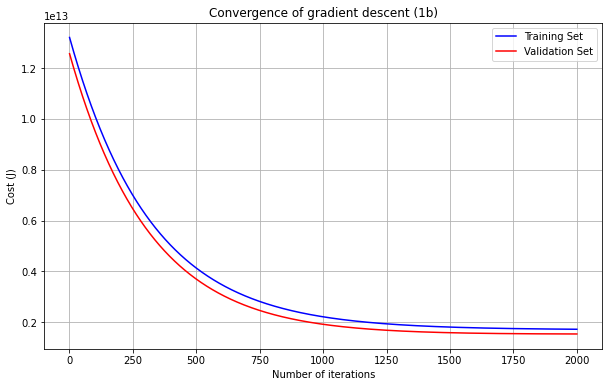

In [40]:
theta = np.zeros(X.shape[1])
iterations = 2000; 
alpha = 0.00000000005; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent1(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (1b)')

# Question 2

## Common Setup

In [41]:
def gradient_descent2(x, y, theta, alpha:float, iterations:int, x_validation, y_validation, debug: bool = False): 
    """ 
    Compute cost for linear regression. 

    Args:
        x : 2D array where each row represent the training example and each column represent 
            m= number of training examples 
            n= number of features (including X_0 column of ones) 
        y : 1D array of labels/target value for each traing example. dimension(m x 1) 
        theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
        alpha (float): Learning rate
        iterations (int): Number of iterations
        x_validation : _description_
        y_validation : _description_
        debug (bool, optional): a print debug shape line. Defaults to False.

    Returns:
        theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
        cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
        validation_costs: Conatins validation loss value for each iteration. 1D array. Dimansion(m x 1) 
    """
    cost_history = np.zeros(iterations) 
    validation_cost = np.zeros(iterations) 
    
    m = len(x)
    m_valid = len(x_validation)
    
    for i in range(iterations): 
        predictions = x.dot(theta) 
        if debug:
            print(f"x = {x.shape}")
            print(f"y = {y.shape}")
            print(f"predictions: {predictions.shape}")
        errors = np.subtract(predictions, y) 
        if debug:
            print(f"errors: {errors.shape}")
            print(type(errors))
        transposed = x.transpose()
        if debug: 
            print(f"transposed = {transposed.shape}")
        sum_delta = (alpha / m) * (transposed).dot(errors); 
        if debug:
            print(f"sum_delta: {sum_delta.shape}")
        theta = theta - sum_delta; 
        if debug:
            print(f"theta: {theta.shape}\n\n")
        cost_history[i] = compute_cost(x, y, theta, m) 
        validation_cost[i] = compute_cost(x_validation, y_validation, theta, m_valid)   
    
    return theta, cost_history, validation_cost

## MinMaxScaler

### Data setup

In [42]:
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [43]:
scaled_data = data_table.copy()

# scaler = StandardScaler()
scaler = MinMaxScaler()

scaled_data[valued_vars] = scaler.fit_transform(scaled_data[valued_vars])
scaled_data[binary_vars] = scaled_data[binary_vars].apply(boolean_map)
scaled_data[furnish_vars] = scaled_data[furnish_vars].apply(scaled_furnish_map)

scaled_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1.0


In [44]:
data_train, data_test = train_test_split(scaled_data, train_size = TRAINING_PERCENT, test_size = 1-TRAINING_PERCENT)

print(f"training data shape = {data_train.shape}")
print(f"test data shape = {data_test.shape}")

training data shape = (436, 13)
test data shape = (109, 13)


In [45]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
267,0.229697,0.224742,0.4,0.000000,0.333333,1,0,0,0,0,0.333333,0,0.5
336,0.187879,0.441924,0.4,0.000000,0.000000,1,0,0,0,1,0.666667,0,0.5
202,0.272727,0.169759,0.2,0.000000,0.000000,1,0,1,0,0,0.333333,0,0.5
339,0.184848,0.105155,0.6,0.333333,0.333333,1,0,0,0,0,0.000000,0,1.0
103,0.384848,0.323024,0.4,0.333333,0.666667,1,1,0,0,1,0.000000,0,1.0


In [46]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
320,0.200000,0.183505,0.4,0.0,0.333333,1,0,0,0,0,0.666667,1,1.0
312,0.203333,0.134021,0.4,0.0,0.000000,1,0,1,0,1,0.000000,1,1.0
401,0.151515,0.539519,0.4,0.0,0.333333,1,0,0,0,0,1.000000,1,0.0
431,0.133333,0.105155,0.6,0.0,0.333333,1,0,1,0,1,0.000000,0,0.0
520,0.060606,0.415808,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0.0


In [47]:
x_train_values = data_train.copy() # get all values
x_valid_values = data_test.copy()
for item in y_var_list:
    y_train_values = x_train_values.pop(item) # get y values and remove from x_values
    y_valid_values = x_valid_values.pop(item)

In [48]:
print(x_train_values.shape)
x_train_values.head()

(436, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
267,0.224742,0.4,0.000000,0.333333,1,0,0,0,0,0.333333,0,0.5
336,0.441924,0.4,0.000000,0.000000,1,0,0,0,1,0.666667,0,0.5
202,0.169759,0.2,0.000000,0.000000,1,0,1,0,0,0.333333,0,0.5
339,0.105155,0.6,0.333333,0.333333,1,0,0,0,0,0.000000,0,1.0
103,0.323024,0.4,0.333333,0.666667,1,1,0,0,1,0.000000,0,1.0


In [49]:
print(y_train_values.shape)
y_train_values.head()

(436,)


267    0.229697
336    0.187879
202    0.272727
339    0.184848
103    0.384848
Name: price, dtype: float64

In [50]:
print(x_valid_values.shape)
x_valid_values.head()

(109, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
320,0.183505,0.4,0.0,0.333333,1,0,0,0,0,0.666667,1,1.0
312,0.134021,0.4,0.0,0.000000,1,0,1,0,1,0.000000,1,1.0
401,0.539519,0.4,0.0,0.333333,1,0,0,0,0,1.000000,1,0.0
431,0.105155,0.6,0.0,0.333333,1,0,1,0,1,0.000000,0,0.0
520,0.415808,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0.0


In [51]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


320    0.200000
312    0.203333
401    0.151515
431    0.133333
520    0.060606
Name: price, dtype: float64

### 2a

In [52]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_a):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [53]:
print(used_train_x.shape)
used_train_x.head()

(436, 5)


,area,bedrooms,bathrooms,stories,parking
267,0.224742,0.4,0.000000,0.333333,0.333333
336,0.441924,0.4,0.000000,0.000000,0.666667
202,0.169759,0.2,0.000000,0.000000,0.333333
339,0.105155,0.6,0.333333,0.333333,0.000000
103,0.323024,0.4,0.333333,0.666667,0.000000


In [54]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 5)


,area,bedrooms,bathrooms,stories,parking
320,0.183505,0.4,0.0,0.333333,0.666667
312,0.134021,0.4,0.0,0.000000,0.000000
401,0.539519,0.4,0.0,0.333333,1.000000
431,0.105155,0.6,0.0,0.333333,0.000000
520,0.415808,0.2,0.0,0.000000,0.000000


In [55]:
print(y_train_values.shape)
y_train_values.head()

(436,)


267    0.229697
336    0.187879
202    0.272727
339    0.184848
103    0.384848
Name: price, dtype: float64

In [56]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


320    0.200000
312    0.203333
401    0.151515
431    0.133333
520    0.060606
Name: price, dtype: float64

In [57]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [58]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [59]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 6)
(436,)
(109, 6)
(109,)


In [60]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1.         0.22474227 0.4        0.         0.33333333 0.33333333]
 [1.         0.4419244  0.4        0.         0.         0.66666667]
 [1.         0.16975945 0.2        0.         0.         0.33333333]
 ...
 [1.         0.36769759 0.4        0.         0.33333333 0.        ]
 [1.         0.11271478 0.2        0.         0.         0.33333333]
 [1.         0.35395189 0.2        0.         0.         0.66666667]]

Y=
[0.22969697 0.18787879 0.27272727 0.18484848 0.38484848 0.13333333
 0.06060606 0.07818182 0.63636364 0.22242424 0.17515152 0.16909091
 0.20545455 0.12121212 0.1030303  0.14484848 0.13333333 0.27272727
 0.16060606 0.49090909 0.29393939 0.32121212 0.27878788 0.16969697
 0.5030303  0.13333333 0.29090909 0.58787879 0.14242424 0.07878788
 0.39393939 0.3030303  0.09393939 0.21818182 0.17878788 0.36363636
 0.06666667 0.39333333 0.42121212 0.33787879 0.29393939 0.42424242
 0.06666667 0.07878788 0.35636364 0.27212121 0.59090909 0.35151515
 0.22424242 0.13636364 0.21878788 0.4

In [61]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0.]
(6,)
(436, 6)
(109, 6)


In [62]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.0483191879560408
The validation cost for given values of theta = 0.042715459010454836


#### final computations

Final values:
	theta = [0.11199632 0.15284433 0.09855485 0.12441418 0.13907653 0.13202174]
	cost = 0.007035114437429281
	validation_cost = 0.006741240207322211


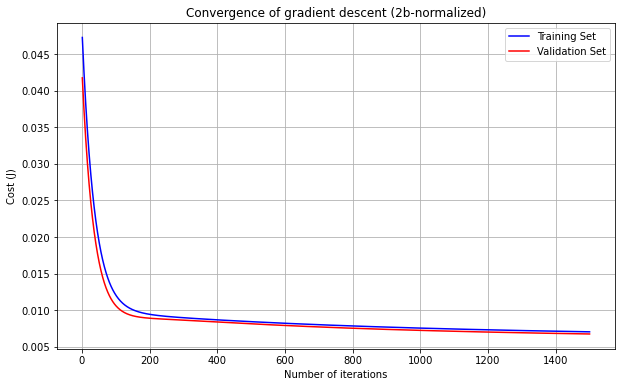

In [63]:
theta = np.zeros(X.shape[1])
iterations = 1500; 
alpha = 0.01; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent2(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (2b-normalized)')

### 2b

In [64]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_b):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [65]:
print(used_train_x.shape)
used_train_x.head()

(436, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
267,0.224742,0.4,0.000000,0.333333,1,0,0,0,0,0.333333,0
336,0.441924,0.4,0.000000,0.000000,1,0,0,0,1,0.666667,0
202,0.169759,0.2,0.000000,0.000000,1,0,1,0,0,0.333333,0
339,0.105155,0.6,0.333333,0.333333,1,0,0,0,0,0.000000,0
103,0.323024,0.4,0.333333,0.666667,1,1,0,0,1,0.000000,0


In [66]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
320,0.183505,0.4,0.0,0.333333,1,0,0,0,0,0.666667,1
312,0.134021,0.4,0.0,0.000000,1,0,1,0,1,0.000000,1
401,0.539519,0.4,0.0,0.333333,1,0,0,0,0,1.000000,1
431,0.105155,0.6,0.0,0.333333,1,0,1,0,1,0.000000,0
520,0.415808,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0


In [67]:
print(y_train_values.shape)
y_train_values.head()

(436,)


267    0.229697
336    0.187879
202    0.272727
339    0.184848
103    0.384848
Name: price, dtype: float64

In [68]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


320    0.200000
312    0.203333
401    0.151515
431    0.133333
520    0.060606
Name: price, dtype: float64

In [69]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [70]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [71]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 12)
(436,)
(109, 12)
(109,)


In [72]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1.         0.22474227 0.4        ... 0.         0.33333333 0.        ]
 [1.         0.4419244  0.4        ... 1.         0.66666667 0.        ]
 [1.         0.16975945 0.2        ... 0.         0.33333333 0.        ]
 ...
 [1.         0.36769759 0.4        ... 0.         0.         0.        ]
 [1.         0.11271478 0.2        ... 0.         0.33333333 0.        ]
 [1.         0.35395189 0.2        ... 0.         0.66666667 0.        ]]

Y=
[0.22969697 0.18787879 0.27272727 0.18484848 0.38484848 0.13333333
 0.06060606 0.07818182 0.63636364 0.22242424 0.17515152 0.16909091
 0.20545455 0.12121212 0.1030303  0.14484848 0.13333333 0.27272727
 0.16060606 0.49090909 0.29393939 0.32121212 0.27878788 0.16969697
 0.5030303  0.13333333 0.29090909 0.58787879 0.14242424 0.07878788
 0.39393939 0.3030303  0.09393939 0.21818182 0.17878788 0.36363636
 0.06666667 0.39333333 0.42121212 0.33787879 0.29393939 0.42424242
 0.06666667 0.07878788 0.35636364 0.27212121 0.59090909 0.35151515
 0.22424242 0

In [73]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12,)
(436, 12)
(109, 12)


In [74]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.0483191879560408
The validation cost for given values of theta = 0.042715459010454836


#### final computations

Final values:
	theta = [0.03825217 0.10141515 0.0659263  0.10778344 0.107276   0.05498074
 0.03671383 0.02982454 0.04898512 0.09855966 0.09509309 0.07066343]
	cost = 0.005018140811854077
	validation_cost = 0.005547057302443373


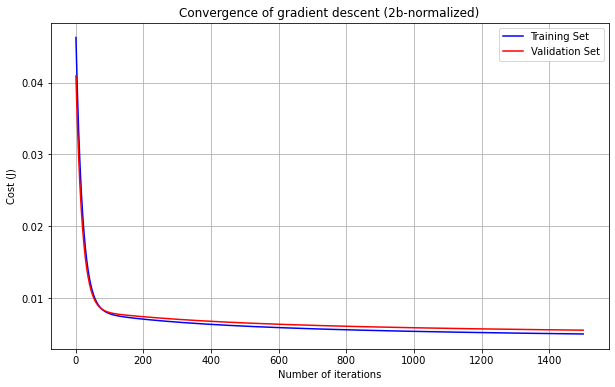

In [75]:
theta = np.zeros(X.shape[1])
iterations = 1500; 
alpha = 0.01; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent2(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (2b-normalized)')

## StandardScaler

### Data setup

In [76]:
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [77]:
scaled_data = data_table.copy()

scaler = StandardScaler()
# scaler = MinMaxScaler()

scaled_data[valued_vars] = scaler.fit_transform(scaled_data[valued_vars])
scaled_data[binary_vars] = scaled_data[binary_vars].apply(boolean_map)
scaled_data[furnish_vars] = scaled_data[furnish_vars].apply(scaled_furnish_map)

scaled_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1.0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.5
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1.0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1.0


In [78]:
data_train, data_test = train_test_split(scaled_data, train_size = TRAINING_PERCENT, test_size = 1-TRAINING_PERCENT)

print(f"training data shape = {data_train.shape}")
print(f"test data shape = {data_test.shape}")

training data shape = (436, 13)
test data shape = (109, 13)


In [79]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
462,-0.902611,-1.379306,0.047278,-0.570187,0.224410,0,0,1,0,0,-0.805741,0,0.5
166,0.296069,1.221991,0.047278,-0.570187,-0.929397,1,0,1,0,1,1.517692,1,0.0
539,-1.558139,-0.996491,-1.308863,-0.570187,-0.929397,0,0,0,0,0,0.355976,0,0.0
163,0.352257,0.772299,0.047278,-0.570187,-0.929397,1,1,1,0,1,-0.805741,1,0.5
466,-0.940069,-0.950369,0.047278,-0.570187,0.224410,0,0,0,0,0,-0.805741,0,0.5


In [80]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
76,1.007785,0.585503,0.047278,1.421812,1.378217,1,0,0,0,1,-0.805741,1,1.0
308,-0.322000,-0.509440,0.047278,-0.570187,0.224410,1,0,1,0,0,0.355976,0,0.5
341,-0.490565,-0.908859,-1.308863,1.421812,-0.929397,1,0,1,0,0,1.517692,0,0.5
459,-0.883881,-0.761267,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0.0
508,-1.164822,-0.346167,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0.0


In [81]:
x_train_values = data_train.copy() # get all values
x_valid_values = data_test.copy()
for item in y_var_list:
    y_train_values = x_train_values.pop(item) # get y values and remove from x_values
    y_valid_values = x_valid_values.pop(item)

In [82]:
print(x_train_values.shape)
x_train_values.head()

(436, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
462,-1.379306,0.047278,-0.570187,0.224410,0,0,1,0,0,-0.805741,0,0.5
166,1.221991,0.047278,-0.570187,-0.929397,1,0,1,0,1,1.517692,1,0.0
539,-0.996491,-1.308863,-0.570187,-0.929397,0,0,0,0,0,0.355976,0,0.0
163,0.772299,0.047278,-0.570187,-0.929397,1,1,1,0,1,-0.805741,1,0.5
466,-0.950369,0.047278,-0.570187,0.224410,0,0,0,0,0,-0.805741,0,0.5


In [83]:
print(y_train_values.shape)
y_train_values.head()

(436,)


462   -0.902611
166    0.296069
539   -1.558139
163    0.352257
466   -0.940069
Name: price, dtype: float64

In [84]:
print(x_valid_values.shape)
x_valid_values.head()

(109, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
76,0.585503,0.047278,1.421812,1.378217,1,0,0,0,1,-0.805741,1,1.0
308,-0.509440,0.047278,-0.570187,0.224410,1,0,1,0,0,0.355976,0,0.5
341,-0.908859,-1.308863,1.421812,-0.929397,1,0,1,0,0,1.517692,0,0.5
459,-0.761267,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0.0
508,-0.346167,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0,0.0


In [85]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


76     1.007785
308   -0.322000
341   -0.490565
459   -0.883881
508   -1.164822
Name: price, dtype: float64

### 2a

In [86]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_a):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [87]:
print(used_train_x.shape)
used_train_x.head()

(436, 5)


,area,bedrooms,bathrooms,stories,parking
462,-1.379306,0.047278,-0.570187,0.224410,-0.805741
166,1.221991,0.047278,-0.570187,-0.929397,1.517692
539,-0.996491,-1.308863,-0.570187,-0.929397,0.355976
163,0.772299,0.047278,-0.570187,-0.929397,-0.805741
466,-0.950369,0.047278,-0.570187,0.224410,-0.805741


In [88]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 5)


,area,bedrooms,bathrooms,stories,parking
76,0.585503,0.047278,1.421812,1.378217,-0.805741
308,-0.509440,0.047278,-0.570187,0.224410,0.355976
341,-0.908859,-1.308863,1.421812,-0.929397,1.517692
459,-0.761267,-1.308863,-0.570187,-0.929397,-0.805741
508,-0.346167,-1.308863,-0.570187,-0.929397,-0.805741


In [89]:
print(y_train_values.shape)
y_train_values.head()

(436,)


462   -0.902611
166    0.296069
539   -1.558139
163    0.352257
466   -0.940069
Name: price, dtype: float64

In [90]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


76     1.007785
308   -0.322000
341   -0.490565
459   -0.883881
508   -1.164822
Name: price, dtype: float64

In [91]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [92]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [93]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 6)
(436,)
(109, 6)
(109,)


In [94]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[ 1.         -1.37930607  0.04727831 -0.57018671  0.22441013 -0.80574124]
 [ 1.          1.22199098  0.04727831 -0.57018671 -0.92939666  1.51769249]
 [ 1.         -0.99649108 -1.30886273 -0.57018671 -0.92939666  0.35597563]
 ...
 [ 1.          1.38341899  0.04727831  1.42181174 -0.92939666 -0.80574124]
 [ 1.         -0.36830551  1.40341936 -0.57018671  0.22441013  0.35597563]
 [ 1.          0.55783003  0.04727831  1.42181174  2.53202371 -0.80574124]]

Y=
[-9.02610715e-01  2.96068921e-01 -1.55813864e+00  3.52257029e-01
 -9.40069453e-01 -4.10597262e-02  7.08115046e-01 -1.57181816e-01
  4.27174507e-01 -1.20228062e+00 -1.23973936e+00  2.01917090e+00
 -5.09293959e-01 -3.03270897e-01  7.13164897e-02 -5.69227941e-01
 -2.09624050e-01 -6.77858283e-01 -9.40069453e-01  4.45903876e-01
 -7.34046391e-01 -1.12736315e+00 -5.65482067e-01 -2.05878176e-01
 -9.77528192e-01 -4.15647113e-01  7.13164897e-02 -7.15317022e-01
 -1.72165311e-01  1.46233967e-01 -1.23973936e+00  8.16745389e-01
 -5.65482067e-01 

In [95]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0.]
(6,)
(436, 6)
(109, 6)


In [96]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y, theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.4902629332514913
The validation cost for given values of theta = 0.1347370667485086


#### final computations

Final values:
	theta = [-0.0139861   0.37222675  0.06959337  0.30131348  0.24187333  0.17560901]
	cost = 0.21850244872489816
	validation_cost = 0.22330448003186196


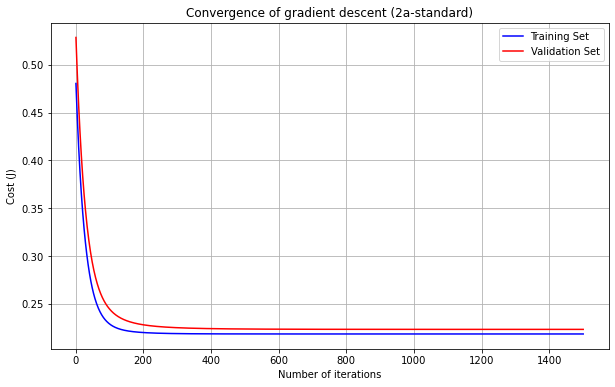

In [97]:
theta = np.zeros(X.shape[1])
iterations = 1500; 
alpha = 0.01; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent2(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (2a-standard)')

### 2b

In [98]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_b):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [99]:
print(used_train_x.shape)
used_train_x.head()

(436, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
462,-1.379306,0.047278,-0.570187,0.224410,0,0,1,0,0,-0.805741,0
166,1.221991,0.047278,-0.570187,-0.929397,1,0,1,0,1,1.517692,1
539,-0.996491,-1.308863,-0.570187,-0.929397,0,0,0,0,0,0.355976,0
163,0.772299,0.047278,-0.570187,-0.929397,1,1,1,0,1,-0.805741,1
466,-0.950369,0.047278,-0.570187,0.224410,0,0,0,0,0,-0.805741,0


In [100]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
76,0.585503,0.047278,1.421812,1.378217,1,0,0,0,1,-0.805741,1
308,-0.509440,0.047278,-0.570187,0.224410,1,0,1,0,0,0.355976,0
341,-0.908859,-1.308863,1.421812,-0.929397,1,0,1,0,0,1.517692,0
459,-0.761267,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0
508,-0.346167,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,0


In [101]:
print(y_train_values.shape)
y_train_values.head()

(436,)


462   -0.902611
166    0.296069
539   -1.558139
163    0.352257
466   -0.940069
Name: price, dtype: float64

In [102]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


76     1.007785
308   -0.322000
341   -0.490565
459   -0.883881
508   -1.164822
Name: price, dtype: float64

In [103]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [104]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [105]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 12)
(436,)
(109, 12)
(109,)


In [106]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[ 1.         -1.37930607  0.04727831 ...  0.         -0.80574124
   0.        ]
 [ 1.          1.22199098  0.04727831 ...  1.          1.51769249
   1.        ]
 [ 1.         -0.99649108 -1.30886273 ...  0.          0.35597563
   0.        ]
 ...
 [ 1.          1.38341899  0.04727831 ...  0.         -0.80574124
   0.        ]
 [ 1.         -0.36830551  1.40341936 ...  0.          0.35597563
   0.        ]
 [ 1.          0.55783003  0.04727831 ...  1.         -0.80574124
   1.        ]]

Y=
[-9.02610715e-01  2.96068921e-01 -1.55813864e+00  3.52257029e-01
 -9.40069453e-01 -4.10597262e-02  7.08115046e-01 -1.57181816e-01
  4.27174507e-01 -1.20228062e+00 -1.23973936e+00  2.01917090e+00
 -5.09293959e-01 -3.03270897e-01  7.13164897e-02 -5.69227941e-01
 -2.09624050e-01 -6.77858283e-01 -9.40069453e-01  4.45903876e-01
 -7.34046391e-01 -1.12736315e+00 -5.65482067e-01 -2.05878176e-01
 -9.77528192e-01 -4.15647113e-01  7.13164897e-02 -7.15317022e-01
 -1.72165311e-01  1.46233967e-01 -1.23973936e+

In [107]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12,)
(436, 12)
(109, 12)


In [108]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.4902629332514913
The validation cost for given values of theta = 0.5389482669940344


#### final computations

Final values:
	theta = [-0.48509417  0.29242161  0.05588174  0.27256291  0.21256564  0.18298817
  0.21700122  0.19808232  0.31991085  0.40028727  0.14546896  0.36011588]
	cost = 0.16643162454287735
	validation_cost = 0.1575566793913318


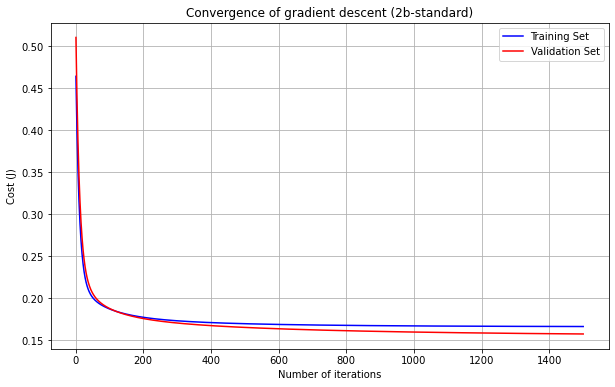

In [109]:
theta = np.zeros(X.shape[1])
iterations = 1500; 
alpha = 0.025; 

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent2(X, Y, theta, alpha, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (2b-standard)')

# Question 3

## Common Setup

In [110]:
# The lambda function is used to quickly and efficently square an entire array
square = lambda x: x ** 2

def param_penalty_cost3(regularization_value:float, theta) -> float:
    """
    evaluates the penalty associated with the current theta values.
    
    penalty = lamda * sum( thetas .^ 2 )

    Args:
        regularization_value (float): lamba. scales the penalty
        theta (np.array): the list of thetas

    Returns:
        float: the total penalty
    """
    sum_squared = np.sum( square(theta) )
    return regularization_value * sum_squared

In [111]:
def gradient_descent3(x, y, theta, alpha:float, regularization:float, iterations:int, x_validation, y_validation, debug: bool = False): 
    """ 
    Compute cost for linear regression. 

    Args:
        x : 2D array where each row represent the training example and each column represent 
            m= number of training examples 
            n= number of features (including X_0 column of ones) 
        y : 1D array of labels/target value for each traing example. dimension(m x 1) 
        theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
        alpha (float): Learning rate
        iterations (int): Number of iterations
        x_validation : _description_
        y_validation : _description_
        debug (bool, optional): a print debug shape line. Defaults to False.

    Returns:
        theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
        cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1) 
        validation_costs: Conatins validation loss value for each iteration. 1D array. Dimansion(m x 1) 
    """
    cost_history = np.zeros(iterations) 
    validation_cost = np.zeros(iterations) 
    
    m = len(x)
    m_valid = len(x_validation)
    
    for i in range(iterations): 
        predictions = x.dot(theta) 
        errors = np.subtract(predictions, y) 
        transposed = x.transpose()
        sum_delta = (alpha / m) * ( (transposed).dot(errors)); 
        theta = theta * (1 - regularization * alpha / m) - sum_delta; 
        cost_history[i] = compute_cost(x, y, theta, m) 
        validation_cost[i] = compute_cost(x_validation, y_validation, theta, m_valid)   
    
    return theta, cost_history, validation_cost

## MinMaxScaler

### Data setup

In [112]:
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [113]:
scaled_data = data_table.copy()

# scaler = StandardScaler()
scaler = MinMaxScaler()

scaled_data[valued_vars] = scaler.fit_transform(scaled_data[valued_vars])
scaled_data[binary_vars] = scaled_data[binary_vars].apply(boolean_map)
scaled_data[furnish_vars] = scaled_data[furnish_vars].apply(scaled_furnish_map)

scaled_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1,0,0,0,1,0.666667,1,1.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1,0,0,0,1,1.000000,0,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1,0,1,0,0,0.666667,1,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1,0,1,0,1,1.000000,1,1.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1,1,1,0,1,0.666667,0,1.0


In [114]:
data_train, data_test = train_test_split(scaled_data, train_size = TRAINING_PERCENT, test_size = 1-TRAINING_PERCENT)

print(f"training data shape = {data_train.shape}")
print(f"test data shape = {data_test.shape}")

training data shape = (436, 13)
test data shape = (109, 13)


In [115]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
70,0.436364,0.161512,0.4,0.333333,0.333333,1,0,1,0,1,0.000000,1,0.5
396,0.151515,0.136770,0.2,0.000000,0.000000,1,0,0,0,0,0.333333,0,0.5
507,0.072727,0.134021,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0.0
444,0.127273,0.101031,0.4,0.000000,0.333333,0,0,0,0,0,0.000000,0,1.0
473,0.108485,0.439863,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0.0


In [116]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
194,0.281818,0.446735,0.4,0.333333,0.0,1,1,1,0,0,0.000000,0,0.5
326,0.193939,0.168385,0.6,0.000000,0.0,0,0,1,0,0,0.000000,0,0.0
443,0.127273,0.183505,0.4,0.000000,0.0,0,0,0,0,0,0.333333,0,0.0
211,0.272727,0.773196,0.4,0.000000,0.0,1,0,0,0,0,0.666667,0,1.0
542,0.000000,0.135395,0.2,0.000000,0.0,1,0,0,0,0,0.000000,0,0.0


In [117]:
x_train_values = data_train.copy() # get all values
x_valid_values = data_test.copy()
for item in y_var_list:
    y_train_values = x_train_values.pop(item) # get y values and remove from x_values
    y_valid_values = x_valid_values.pop(item)

In [118]:
print(x_train_values.shape)
x_train_values.head()

(436, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
70,0.161512,0.4,0.333333,0.333333,1,0,1,0,1,0.000000,1,0.5
396,0.136770,0.2,0.000000,0.000000,1,0,0,0,0,0.333333,0,0.5
507,0.134021,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0.0
444,0.101031,0.4,0.000000,0.333333,0,0,0,0,0,0.000000,0,1.0
473,0.439863,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0,0.0


In [119]:
print(y_train_values.shape)
y_train_values.head()

(436,)


70     0.436364
396    0.151515
507    0.072727
444    0.127273
473    0.108485
Name: price, dtype: float64

In [120]:
print(x_valid_values.shape)
x_valid_values.head()

(109, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
194,0.446735,0.4,0.333333,0.0,1,1,1,0,0,0.000000,0,0.5
326,0.168385,0.6,0.000000,0.0,0,0,1,0,0,0.000000,0,0.0
443,0.183505,0.4,0.000000,0.0,0,0,0,0,0,0.333333,0,0.0
211,0.773196,0.4,0.000000,0.0,1,0,0,0,0,0.666667,0,1.0
542,0.135395,0.2,0.000000,0.0,1,0,0,0,0,0.000000,0,0.0


In [121]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


194    0.281818
326    0.193939
443    0.127273
211    0.272727
542    0.000000
Name: price, dtype: float64

### 3a

In [122]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_a):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [123]:
print(used_train_x.shape)
used_train_x.head()

(436, 5)


,area,bedrooms,bathrooms,stories,parking
70,0.161512,0.4,0.333333,0.333333,0.000000
396,0.136770,0.2,0.000000,0.000000,0.333333
507,0.134021,0.2,0.000000,0.000000,0.000000
444,0.101031,0.4,0.000000,0.333333,0.000000
473,0.439863,0.2,0.000000,0.000000,0.000000


In [124]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 5)


,area,bedrooms,bathrooms,stories,parking
194,0.446735,0.4,0.333333,0.0,0.000000
326,0.168385,0.6,0.000000,0.0,0.000000
443,0.183505,0.4,0.000000,0.0,0.333333
211,0.773196,0.4,0.000000,0.0,0.666667
542,0.135395,0.2,0.000000,0.0,0.000000


In [125]:
print(y_train_values.shape)
y_train_values.head()

(436,)


70     0.436364
396    0.151515
507    0.072727
444    0.127273
473    0.108485
Name: price, dtype: float64

In [126]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


194    0.281818
326    0.193939
443    0.127273
211    0.272727
542    0.000000
Name: price, dtype: float64

In [127]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [128]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [129]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 6)
(436,)
(109, 6)
(109,)


In [130]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1.         0.16151203 0.4        0.33333333 0.33333333 0.        ]
 [1.         0.13676976 0.2        0.         0.         0.33333333]
 [1.         0.13402062 0.2        0.         0.         0.        ]
 ...
 [1.         0.32371134 0.2        0.         0.33333333 0.        ]
 [1.         0.05670103 0.4        0.         0.33333333 0.        ]
 [1.         0.30309278 0.2        0.         0.         0.33333333]]

Y=
[0.43636364 0.15151515 0.07272727 0.12727273 0.10848485 0.05454545
 0.34848485 0.3030303  0.19545455 0.1030303  0.12121212 0.20909091
 0.35757576 0.14848485 0.0569697  0.25454545 0.21212121 0.25454545
 0.14242424 0.24242424 0.27272727 0.04242424 0.56666667 0.47272727
 0.15151515 0.17575758 0.1030303  0.21212121 0.40606061 0.5030303
 0.42424242 0.23939394 0.48424242 0.13939394 0.3        0.27212121
 0.24242424 0.47575758 0.19393939 0.37515152 0.28484848 0.15151515
 0.23636364 0.03030303 0.27272727 0.3030303  0.11818182 0.15151515
 0.38787879 0.17515152 0.61818182 0.22

In [131]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0.]
(6,)
(436, 6)
(109, 6)


In [132]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.048867273692471
The validation cost for given values of theta = 0.04052311606473408


#### final computations

Final values:
	theta = [0.14448376 0.10491758 0.08877382 0.08897129 0.11301453 0.10744942]
	cost = 0.008164308617259497
	validation_cost = 0.00634809640100599


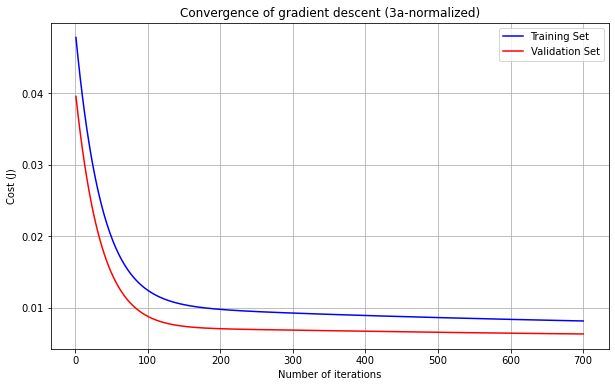

In [133]:
theta = np.zeros(X.shape[1])
iterations = 700; 
alpha = 0.01; 
regularization_val = 0.1

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent3(X, Y, theta, alpha, regularization_val, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (3a-normalized)')

### 3b

In [134]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_b):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [135]:
print(used_train_x.shape)
used_train_x.head()

(436, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
70,0.161512,0.4,0.333333,0.333333,1,0,1,0,1,0.000000,1
396,0.136770,0.2,0.000000,0.000000,1,0,0,0,0,0.333333,0
507,0.134021,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0
444,0.101031,0.4,0.000000,0.333333,0,0,0,0,0,0.000000,0
473,0.439863,0.2,0.000000,0.000000,1,0,0,0,0,0.000000,0


In [136]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
194,0.446735,0.4,0.333333,0.0,1,1,1,0,0,0.000000,0
326,0.168385,0.6,0.000000,0.0,0,0,1,0,0,0.000000,0
443,0.183505,0.4,0.000000,0.0,0,0,0,0,0,0.333333,0
211,0.773196,0.4,0.000000,0.0,1,0,0,0,0,0.666667,0
542,0.135395,0.2,0.000000,0.0,1,0,0,0,0,0.000000,0


In [137]:
print(y_train_values.shape)
y_train_values.head()

(436,)


70     0.436364
396    0.151515
507    0.072727
444    0.127273
473    0.108485
Name: price, dtype: float64

In [138]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


194    0.281818
326    0.193939
443    0.127273
211    0.272727
542    0.000000
Name: price, dtype: float64

In [139]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [140]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [141]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 12)
(436,)
(109, 12)
(109,)


In [142]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[1.         0.16151203 0.4        ... 1.         0.         1.        ]
 [1.         0.13676976 0.2        ... 0.         0.33333333 0.        ]
 [1.         0.13402062 0.2        ... 0.         0.         0.        ]
 ...
 [1.         0.32371134 0.2        ... 0.         0.         0.        ]
 [1.         0.05670103 0.4        ... 0.         0.         0.        ]
 [1.         0.30309278 0.2        ... 0.         0.33333333 0.        ]]

Y=
[0.43636364 0.15151515 0.07272727 0.12727273 0.10848485 0.05454545
 0.34848485 0.3030303  0.19545455 0.1030303  0.12121212 0.20909091
 0.35757576 0.14848485 0.0569697  0.25454545 0.21212121 0.25454545
 0.14242424 0.24242424 0.27272727 0.04242424 0.56666667 0.47272727
 0.15151515 0.17575758 0.1030303  0.21212121 0.40606061 0.5030303
 0.42424242 0.23939394 0.48424242 0.13939394 0.3        0.27212121
 0.24242424 0.47575758 0.19393939 0.37515152 0.28484848 0.15151515
 0.23636364 0.03030303 0.27272727 0.3030303  0.11818182 0.15151515
 0.38787879 0.

In [143]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12,)
(436, 12)
(109, 12)


In [144]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.048867273692471
The validation cost for given values of theta = 0.04052311606473408


#### final computations

Final values:
	theta = [0.00615615 0.20931003 0.06604143 0.21960947 0.1299485  0.04866101
 0.03530488 0.02856228 0.0649248  0.08089474 0.10407422 0.05673377]
	cost = 0.004541297005609189
	validation_cost = 0.0038903399129991178


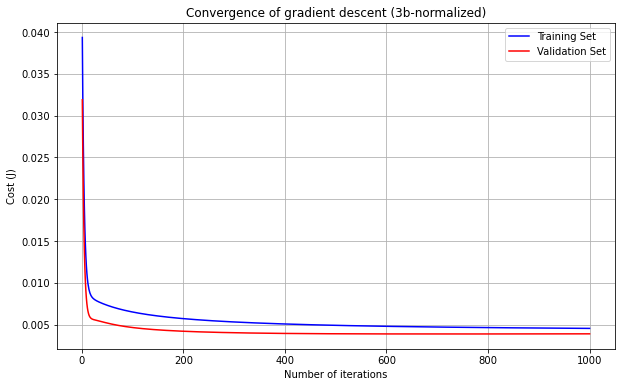

In [145]:
theta = np.zeros(X.shape[1])
iterations = 1000; 
alpha = 0.05; 
regularization_val = 0.5

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent3(X, Y, theta, alpha, regularization_val, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (3b-normalized)')

## StandardScaler

### Data setup

In [146]:
data_table.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [147]:
scaled_data = data_table.copy()

scaler = StandardScaler()
# scaler = MinMaxScaler()

scaled_data[valued_vars] = scaler.fit_transform(scaled_data[valued_vars])
scaled_data[binary_vars] = scaled_data[binary_vars].apply(boolean_map)
scaled_data[furnish_vars] = scaled_data[furnish_vars].apply(scaled_furnish_map)

scaled_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,1.0
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,1.0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,0.5
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,1.0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,1.0


In [148]:
data_train, data_test = train_test_split(scaled_data, train_size = TRAINING_PERCENT, test_size = 1-TRAINING_PERCENT)

print(f"training data shape = {data_train.shape}")
print(f"test data shape = {data_test.shape}")

training data shape = (436, 13)
test data shape = (109, 13)


In [149]:
data_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
100,0.783033,0.668524,0.047278,1.421812,-0.929397,1,0,1,0,1,-0.805741,1,0.0
291,-0.303271,-1.013556,0.047278,-0.570187,0.224410,1,0,1,0,1,-0.805741,0,0.0
139,0.520821,0.557830,0.047278,-0.570187,-0.929397,1,1,1,0,1,1.517692,1,1.0
60,1.269996,0.391790,0.047278,1.421812,0.224410,1,1,0,0,0,0.355976,0,0.5
264,-0.190895,-0.115555,-1.308863,-0.570187,0.224410,1,0,1,0,0,-0.805741,0,0.5


In [150]:
data_test.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
92,0.876679,-0.161678,0.047278,1.421812,2.532024,1,1,0,0,1,-0.805741,0,1.0
533,-1.427033,-1.268613,0.047278,-0.570187,0.224410,1,0,0,0,0,-0.805741,0,0.0
358,-0.546753,-0.770492,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,1,0.5
289,-0.303271,0.322606,-1.308863,-0.570187,-0.929397,1,1,1,0,0,1.517692,0,0.5
117,0.633198,-0.669023,1.403419,-0.570187,0.224410,1,1,0,0,1,-0.805741,0,1.0


In [151]:
x_train_values = data_train.copy() # get all values
x_valid_values = data_test.copy()
for item in y_var_list:
    y_train_values = x_train_values.pop(item) # get y values and remove from x_values
    y_valid_values = x_valid_values.pop(item)

In [152]:
print(x_train_values.shape)
x_train_values.head()

(436, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
100,0.668524,0.047278,1.421812,-0.929397,1,0,1,0,1,-0.805741,1,0.0
291,-1.013556,0.047278,-0.570187,0.224410,1,0,1,0,1,-0.805741,0,0.0
139,0.557830,0.047278,-0.570187,-0.929397,1,1,1,0,1,1.517692,1,1.0
60,0.391790,0.047278,1.421812,0.224410,1,1,0,0,0,0.355976,0,0.5
264,-0.115555,-1.308863,-0.570187,0.224410,1,0,1,0,0,-0.805741,0,0.5


In [153]:
print(y_train_values.shape)
y_train_values.head()

(436,)


100    0.783033
291   -0.303271
139    0.520821
60     1.269996
264   -0.190895
Name: price, dtype: float64

In [154]:
print(x_valid_values.shape)
x_valid_values.head()

(109, 12)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
92,-0.161678,0.047278,1.421812,2.532024,1,1,0,0,1,-0.805741,0,1.0
533,-1.268613,0.047278,-0.570187,0.224410,1,0,0,0,0,-0.805741,0,0.0
358,-0.770492,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,1,0.5
289,0.322606,-1.308863,-0.570187,-0.929397,1,1,1,0,0,1.517692,0,0.5
117,-0.669023,1.403419,-0.570187,0.224410,1,1,0,0,1,-0.805741,0,1.0


In [155]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


92     0.876679
533   -1.427033
358   -0.546753
289   -0.303271
117    0.633198
Name: price, dtype: float64

### 3a

In [156]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_a):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [157]:
print(used_train_x.shape)
used_train_x.head()

(436, 5)


,area,bedrooms,bathrooms,stories,parking
100,0.668524,0.047278,1.421812,-0.929397,-0.805741
291,-1.013556,0.047278,-0.570187,0.224410,-0.805741
139,0.557830,0.047278,-0.570187,-0.929397,1.517692
60,0.391790,0.047278,1.421812,0.224410,0.355976
264,-0.115555,-1.308863,-0.570187,0.224410,-0.805741


In [158]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 5)


,area,bedrooms,bathrooms,stories,parking
92,-0.161678,0.047278,1.421812,2.532024,-0.805741
533,-1.268613,0.047278,-0.570187,0.224410,-0.805741
358,-0.770492,-1.308863,-0.570187,-0.929397,-0.805741
289,0.322606,-1.308863,-0.570187,-0.929397,1.517692
117,-0.669023,1.403419,-0.570187,0.224410,-0.805741


In [159]:
print(y_train_values.shape)
y_train_values.head()

(436,)


100    0.783033
291   -0.303271
139    0.520821
60     1.269996
264   -0.190895
Name: price, dtype: float64

In [160]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


92     0.876679
533   -1.427033
358   -0.546753
289   -0.303271
117    0.633198
Name: price, dtype: float64

In [161]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [162]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [163]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 6)
(436,)
(109, 6)
(109,)


In [164]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[ 1.          0.66852353  0.04727831  1.42181174 -0.92939666 -0.80574124]
 [ 1.         -1.01355632  0.04727831 -0.57018671  0.22441013 -0.80574124]
 [ 1.          0.55783003  0.04727831 -0.57018671 -0.92939666  1.51769249]
 ...
 [ 1.          1.58174483  1.40341936  3.41381019  2.53202371  1.51769249]
 [ 1.         -0.53065597  0.04727831 -0.57018671  0.22441013 -0.80574124]
 [ 1.         -0.92269542 -1.30886273  1.42181174 -0.92939666 -0.80574124]]

Y=
[ 7.83032524e-01 -3.03270897e-01  5.20821353e-01  1.26999613e+00
 -1.90894681e-01  5.95738831e-01  1.56966604e+00  3.29781786e-01
 -2.65812158e-01 -3.59459005e-01 -1.42703306e+00  7.45573785e-01
 -7.52775760e-01  3.38577510e-02  4.45903876e-01 -6.96587652e-01
  2.77339552e-01 -6.59128914e-01  7.45573785e-01  3.38577510e-02
 -7.34046391e-01 -8.08963868e-01 -8.65151976e-01 -5.65482067e-01
  9.14138109e-01 -1.12736315e+00 -1.16482189e+00  1.77351649e+00
 -7.90234499e-01 -6.77858283e-01 -3.78188374e-01  5.58280092e-01
 -3.03270897e-01 

In [165]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0.]
(6,)
(436, 6)
(109, 6)


In [166]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.5129979659285091
The validation cost for given values of theta = 0.44800813628596337


#### final computations

Final values:
	theta = [0.0119331  0.37625435 0.08157644 0.29432171 0.25011526 0.19543054]
	cost = 0.22537468917961279
	validation_cost = 0.1964663322638285


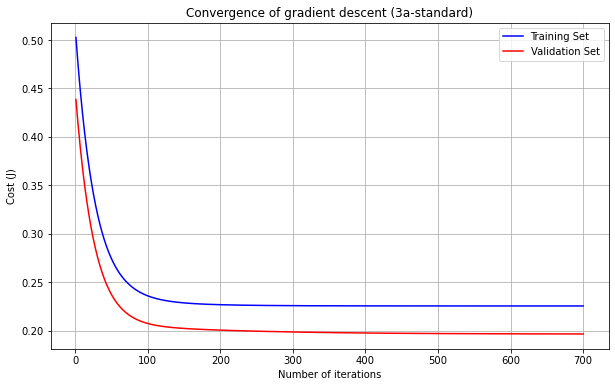

In [167]:
theta = np.zeros(X.shape[1])
iterations = 700; 
alpha = 0.01; 
regularization_val = 0.1

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent3(X, Y, theta, alpha, regularization_val, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (3a-standard)')

### 3b

In [168]:
used_train_x = x_train_values.copy()
used_valid_x = x_valid_values.copy()

# This was built to account for hard set items not existing
for item in set(var_list).difference(used_vars_b):
    try:
        used_train_x.pop(item)
        used_valid_x.pop(item)
    except KeyError:
        print(f"{item}   wasn't found");

price   wasn't found


In [169]:
print(used_train_x.shape)
used_train_x.head()

(436, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
100,0.668524,0.047278,1.421812,-0.929397,1,0,1,0,1,-0.805741,1
291,-1.013556,0.047278,-0.570187,0.224410,1,0,1,0,1,-0.805741,0
139,0.557830,0.047278,-0.570187,-0.929397,1,1,1,0,1,1.517692,1
60,0.391790,0.047278,1.421812,0.224410,1,1,0,0,0,0.355976,0
264,-0.115555,-1.308863,-0.570187,0.224410,1,0,1,0,0,-0.805741,0


In [170]:
print(used_valid_x.shape)
used_valid_x.head()

(109, 11)


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
92,-0.161678,0.047278,1.421812,2.532024,1,1,0,0,1,-0.805741,0
533,-1.268613,0.047278,-0.570187,0.224410,1,0,0,0,0,-0.805741,0
358,-0.770492,-1.308863,-0.570187,-0.929397,1,0,0,0,0,-0.805741,1
289,0.322606,-1.308863,-0.570187,-0.929397,1,1,1,0,0,1.517692,0
117,-0.669023,1.403419,-0.570187,0.224410,1,1,0,0,1,-0.805741,0


In [171]:
print(y_train_values.shape)
y_train_values.head()

(436,)


100    0.783033
291   -0.303271
139    0.520821
60     1.269996
264   -0.190895
Name: price, dtype: float64

In [172]:
print(y_valid_values.shape)
y_valid_values.head()

(109,)


92     0.876679
533   -1.427033
358   -0.546753
289   -0.303271
117    0.633198
Name: price, dtype: float64

In [173]:
X = (used_train_x.values)  # get x values
Y = (y_train_values.values) # get y values
# print(X.shape)

x_0 = np.ones((len(X), 1))
X = np.hstack( (x_0 , X)  )

In [174]:
valid_X = (used_valid_x.values)  # get x values
valid_Y = (y_valid_values.values) # get y values
# print(valid_X.shape)

x_0 = np.ones((len(valid_X), 1))
valid_X = np.hstack( (x_0 , valid_X)  )

#### Data testing and validation

In [175]:
print(X.shape)
print(Y.shape)
print(valid_X.shape)
print(valid_Y.shape)

(436, 12)
(436,)
(109, 12)
(109,)


In [176]:
print(f"X=\n{str(X)}\n")
print(f"Y=\n{str(Y)}\n")

X=
[[ 1.          0.66852353  0.04727831 ...  1.         -0.80574124
   1.        ]
 [ 1.         -1.01355632  0.04727831 ...  1.         -0.80574124
   0.        ]
 [ 1.          0.55783003  0.04727831 ...  1.          1.51769249
   1.        ]
 ...
 [ 1.          1.58174483  1.40341936 ...  1.          1.51769249
   1.        ]
 [ 1.         -0.53065597  0.04727831 ...  1.         -0.80574124
   0.        ]
 [ 1.         -0.92269542 -1.30886273 ...  0.         -0.80574124
   0.        ]]

Y=
[ 7.83032524e-01 -3.03270897e-01  5.20821353e-01  1.26999613e+00
 -1.90894681e-01  5.95738831e-01  1.56966604e+00  3.29781786e-01
 -2.65812158e-01 -3.59459005e-01 -1.42703306e+00  7.45573785e-01
 -7.52775760e-01  3.38577510e-02  4.45903876e-01 -6.96587652e-01
  2.77339552e-01 -6.59128914e-01  7.45573785e-01  3.38577510e-02
 -7.34046391e-01 -8.08963868e-01 -8.65151976e-01 -5.65482067e-01
  9.14138109e-01 -1.12736315e+00 -1.16482189e+00  1.77351649e+00
 -7.90234499e-01 -6.77858283e-01 -3.78188374e-

In [177]:
theta = np.zeros(X.shape[1])
print(theta)
print(theta.shape)
print(X.shape)
print(valid_X.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(12,)
(436, 12)
(109, 12)


In [178]:
# This is here just to check that the cost function is working correctly
cost = compute_cost(X, Y,theta, len(X), debug=False) 
print('The training cost for given values of theta =', cost)

cost = compute_cost(valid_X, valid_Y,theta, len(valid_X), debug=False) 
print('The validation cost for given values of theta =', cost)

The training cost for given values of theta = 0.5129979659285091
The validation cost for given values of theta = 0.44800813628596337


#### final computations

Final values:
	theta = [-0.55405403  0.28087491  0.06114396  0.26553822  0.20784548  0.26491072
  0.20284355  0.17364767  0.41622172  0.4634069   0.14751993  0.30763005]
	cost = 0.17145383802367825
	validation_cost = 0.13365241143810216


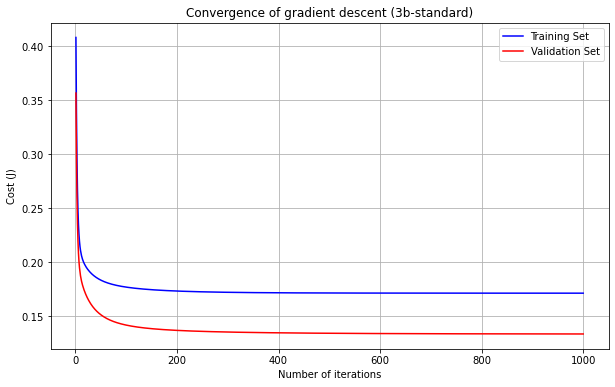

In [179]:
theta = np.zeros(X.shape[1])
iterations = 1000; 
alpha = 0.1; 
regularization_val = 0.4

# debug = True
# debug = False

theta, cost_history, validation_history = gradient_descent3(X, Y, theta, alpha, regularization_val, iterations, valid_X, valid_Y) 
print('Final values:\n\ttheta =', theta) 
print(f"\tcost = {cost_history[-1]}") 
print(f"\tvalidation_cost = {validation_history[-1]}") 
plot_2_sets_of_data(iterations, cost_history, validation_history, 'Convergence of gradient descent (3b-standard)')